In [1]:
import seaborn as sns
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
%pylab inline
import os
from __future__ import print_function
from __future__ import division
import os, sys
# hook up all scripts
sys.path.append(os.path.abspath('../../scripts')) # if notebook in folder

import preprocessing_time_series as pts

os.chdir(pts.working_dir() + 'Feature_releases/release_v02/')

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_train = pd.read_csv('train_Queretaro de Arteaga.csv')
print(data_train.shape)
data_train.head()

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(529832, 237)


,Agencia_ID,Canal_ID,Cliente_ID,Demanda_uni_equil,Dev_proxima,Dev_proxima_by_uni,Dev_uni_proxima,Log_Demanda,Log_Demanda_Mean_Producto_ID_Cliente_ID_Agencia_ID,Log_Demanda_Mean_Producto_ID_Cliente_ID_Ruta_SAK,...,No_remains_Mean_Producto_ID_Ruta_SAK_4last,No_remains_Mean_brand_Cliente_ID_Agencia_ID_4last,Ordered_4last,Ordered_Mean_Producto_ID_Cliente_ID_Agencia_ID_4last,Ordered_Mean_Producto_ID_Cliente_ID_Ruta_SAK_4last,Ordered_Mean_Producto_ID_Ruta_SAK_4last,Ordered_Mean_brand_Cliente_ID_Agencia_ID_4last,Venta_hoy_4last,Venta_hoy_by_uni_4last,Venta_uni_hoy_4last
0,1210,5,653039,395.0,0.00,NaN,0.0,5.981414,5.712620,6.255725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1210,5,653039,575.0,64.82,9.26,7.0,6.356108,6.137538,6.605798,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1210,5,653039,223.0,0.00,NaN,0.0,5.411646,3.830277,5.193466,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1210,5,653039,40.0,0.00,NaN,0.0,3.713572,4.586806,4.949039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1210,5,653039,182.0,0.00,NaN,0.0,5.209486,5.206432,5.203316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
means_by_split = [x for x in data_train.columns if 'Mean' in x and not(x[-2] == '_' or x[-4:] == 'last')] #its mean, its not a lag
print(means_by_split)
data_for_model = data_train.fillna(-9).drop([u'Town', u'State', u'Venta_uni_hoy', u'Venta_hoy', u'Dev_uni_proxima',
       u'Dev_proxima', u'Demanda_uni_equil', u'Dev_proxima_by_uni', u'No_remains', 
        u'Venta_hoy_by_uni', u'Ordered'] + means_by_split, axis=1).set_index(u'Semana')

['Log_Demanda_Mean_Producto_ID_Cliente_ID_Agencia_ID', 'Log_Demanda_Mean_Producto_ID_Cliente_ID_Ruta_SAK', 'Log_Demanda_Mean_Producto_ID_Ruta_SAK', 'Log_Demanda_Mean_brand_Cliente_ID_Agencia_ID', 'Log_Venta_uni_hoy_Mean_Producto_ID_Cliente_ID_Agencia_ID', 'Log_Venta_uni_hoy_Mean_Producto_ID_Cliente_ID_Ruta_SAK', 'Log_Venta_uni_hoy_Mean_Producto_ID_Ruta_SAK', 'Log_Venta_uni_hoy_Mean_brand_Cliente_ID_Agencia_ID', 'No_remains_Mean_Producto_ID_Cliente_ID_Agencia_ID', 'No_remains_Mean_Producto_ID_Cliente_ID_Ruta_SAK', 'No_remains_Mean_Producto_ID_Ruta_SAK', 'No_remains_Mean_brand_Cliente_ID_Agencia_ID', 'Ordered_Mean_Producto_ID_Cliente_ID_Agencia_ID', 'Ordered_Mean_Producto_ID_Cliente_ID_Ruta_SAK', 'Ordered_Mean_Producto_ID_Ruta_SAK', 'Ordered_Mean_brand_Cliente_ID_Agencia_ID']


Случайный лес измеряет важность признаков, по тому насколько сильно они смогли уменьшить значения критерия информативности в совокупности по всем деревьям. Важность нормализована так, что сумма по всем признакам равна 1.0.

In [15]:
X_train = data_for_model.loc[3:7,:].drop('Log_Demanda', axis=1)
y_train = data_for_model.loc[3:7,:]['Log_Demanda']
X_test = data_for_model.loc[8:9,:].drop('Log_Demanda', axis=1)
y_test = data_for_model.loc[8:9,:]['Log_Demanda']
X_train.head()

,Agencia_ID,Canal_ID,Cliente_ID,Log_Dev_proxima,Log_Dev_uni_proxima,Log_Venta_hoy,Log_Venta_uni_hoy,Producto_ID,Ruta_SAK,brand,...,No_remains_Mean_Producto_ID_Ruta_SAK_4last,No_remains_Mean_brand_Cliente_ID_Agencia_ID_4last,Ordered_4last,Ordered_Mean_Producto_ID_Cliente_ID_Agencia_ID_4last,Ordered_Mean_Producto_ID_Cliente_ID_Ruta_SAK_4last,Ordered_Mean_Producto_ID_Ruta_SAK_4last,Ordered_Mean_brand_Cliente_ID_Agencia_ID_4last,Venta_hoy_4last,Venta_hoy_by_uni_4last,Venta_uni_hoy_4last
Semana,,,,,,,,,,,,,,,,,,,,,
3,1210,5,653039,0.0,0.0,1.0,1.0,1240,3001,3.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
3,1210,5,653039,1.0,1.0,1.0,1.0,1250,3001,3.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
3,1210,5,653039,0.0,0.0,1.0,1.0,1644,3001,3.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
3,1210,5,653039,0.0,0.0,1.0,1.0,2261,3001,2.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
3,1210,5,653039,0.0,0.0,1.0,1.0,4280,3001,39.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0


In [16]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10, criterion='mse', n_jobs=-1, verbose=5)
rf.fit(X_train, y_train)

building tree 1 of 10
 building tree 3 of 10building tree 2 of 10
 
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.1min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
           verbose=5, warm_start=False)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.6s finished


RMSE:  0.363920338297


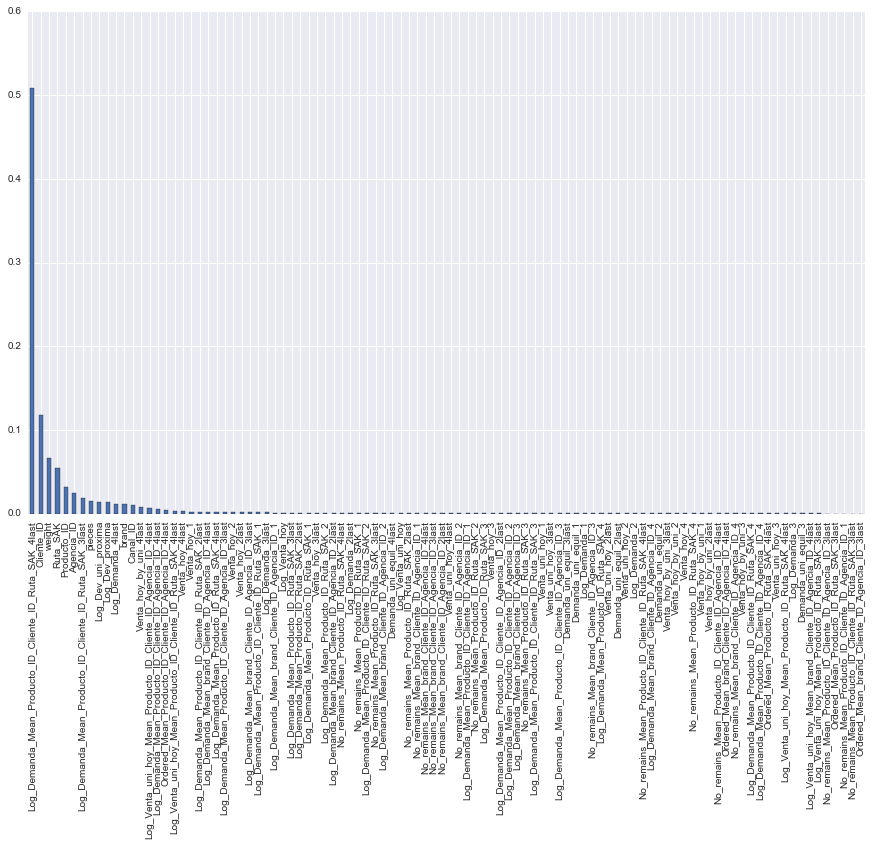

In [20]:
from sklearn.metrics import mean_squared_error
y_pred = rf.predict(X_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances.head(100).plot.bar(figsize=(15,9))

Вот так-то - средние за 4 предыдущих недели рулят:)